In [1]:
#!pip install gensim

import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
import bz2

%matplotlib inline

In [ ]:
!python ./src/load_models_data.py

# Load Data

## Quotes

In [3]:
data_folder = './data/'
data_file = 'quotes-sample.json.bz2'
data_path = data_folder + data_file
chunk_size = 1e5

# Load 1 chunk
f = bz2.open(data_path, "rb")
data=pd.read_json(f, lines=True, chunksize=chunk_size)


## Speaker Attributes

In [4]:
from src.prep_utilities import * 
from src.prep_pipeline import *

In [5]:
speaker_file = 'speaker_attributes_processed.parquet'
speaker_path = data_folder + speaker_file

start = timeit.default_timer()
speaker_attributes = pd.read_parquet(speaker_path)

stop = timeit.default_timer()
print(f'Time: {stop-start:.1f}s')

Time: 18.9s


In [6]:
speaker_attributes.head(5)

,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,...,type,religion,nationality_label,gender_label,ethnic_group_label,occupation_label,party_label,academic_degree_label,candidacy_label,religion_label
id,,,,,,,,,,,,,,,,,,,,,
Q23,"[Washington, President Washington, G. Washingt...",[+1732-02-22T00:00:00Z],"[Q161885, Q30]",[Q6581097],1395141751,None,W000178,"[Q82955, Q189290, Q131512, Q1734662, Q294126, ...",[Q327591],None,...,item,[Q682443],"[Great Britain, United States of America]",male,None,"[politician, military officer, farmer, cartogr...",[independent politician],None,"[1792 United States presidential election, 178...",[Episcopal Church]
Q42,"[Douglas Noel Adams, Douglas Noël Adams, Dougl...",[+1952-03-11T00:00:00Z],[Q145],[Q6581097],1395737157,[Q7994501],None,"[Q214917, Q28389, Q6625963, Q4853732, Q1884422...",None,None,...,item,None,[United Kingdom],male,[White British],"[playwright, screenwriter, novelist, children'...",None,None,None,None
Q1868,"[Paul Marie Ghislain Otlet, Paul Marie Otlet]",[+1868-08-23T00:00:00Z],[Q31],[Q6581097],1380367296,None,None,"[Q36180, Q40348, Q182436, Q1265807, Q205375, Q...",None,None,...,item,None,[Belgium],male,None,"[writer, lawyer, librarian, information scient...",None,None,None,None
Q207,"[George Walker Bush, Bush Jr., Dubya, GWB, Bus...",[+1946-07-06T00:00:00Z],[Q30],[Q6581097],1395142029,None,None,"[Q82955, Q15982858, Q18814623, Q1028181, Q1408...",[Q29468],None,...,item,"[Q329646, Q682443, Q33203]",[United States of America],male,None,"[politician, motivational speaker, autobiograp...",[Republican Party],None,"[2000 United States presidential election, 200...","[United Methodist Church, Episcopal Church, Me..."
Q297,"[Velázquez, Diego Rodríguez de Silva y Velázqu...",[+1599-06-06T00:00:00Z],[Q29],[Q6581097],1391704596,None,None,[Q1028181],None,None,...,item,None,[Spain],male,None,[painter],None,None,None,None


# Pre-processing (don't run again)

In [7]:
# Write the pre processed data sample to parquet
# Iterate through chunks

for i_chunk, chunk in enumerate(data):
    start = timeit.default_timer()

    # Pre-process chunk
    print(f"Pre-processing chunk {i_chunk}")
    chunk_prep = prep_docs(chunk, speaker_attributes)
    
    # Write to parquet file
    table = pa.Table.from_pandas(chunk_prep)
    
    # for the first chunk of records
    if i_chunk == 0:
        # create a parquet write object giving it an output file
        pqwriter = pq.ParquetWriter(data_folder + 'quotes-sample-prep.parquet', table.schema)

    pqwriter.write_table(table)
    
    stop = timeit.default_timer()
    print(f'Time for chunk {i_chunk}: {stop-start:.1f}s\n')
        
# close the parquet writer
if pqwriter:
    pqwriter.close()

Pre-processing chunk 0
Deleting rows with 'None' speaker...
Simplifying date column...


/home/andre/Documents/ADA/ada-2021-project-madam-main/src/prep_pipeline.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_doc['date'] = copy_doc['date'].apply(lambda x: get_yyyy_mm(x))


Tokenizing quotes...


/home/andre/Documents/ADA/ada-2021-project-madam-main/src/prep_pipeline.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_doc['tokens'] = copy_doc['quotation'].apply(


Filtering rows...
Getting url domains...
Getting genders...
Time for chunk 0: 286.1s

Pre-processing chunk 1
Deleting rows with 'None' speaker...
Simplifying date column...
Tokenizing quotes...
Filtering rows...
Getting url domains...
Getting genders...
Time for chunk 1: 280.8s

Pre-processing chunk 2
Deleting rows with 'None' speaker...
Simplifying date column...
Tokenizing quotes...
Filtering rows...
Getting url domains...
Getting genders...
Time for chunk 2: 291.3s

Pre-processing chunk 3
Deleting rows with 'None' speaker...
Simplifying date column...
Tokenizing quotes...
Filtering rows...
Getting url domains...
Getting genders...
Time for chunk 3: 282.0s

Pre-processing chunk 4
Deleting rows with 'None' speaker...
Simplifying date column...
Tokenizing quotes...
Filtering rows...
Getting url domains...
Getting genders...
Time for chunk 4: 277.7s

Pre-processing chunk 5
Deleting rows with 'None' speaker...
Simplifying date column...
Tokenizing quotes...
Filtering rows...
Getting url 

KeyboardInterrupt: 

In [ ]:
prep_pq = pd.read_parquet(data_folder + 'quotes-sample-prep.parquet')

# Initial Analysis

## Gender representation over time

In [10]:
# Date range
min_month = "2015-01"
max_month = "2020-04"
months = pd.period_range(min_month, max_month, freq='M')

# dictionary to keep counts for different genders, the arrays start at
gender_count = {"male": [], "female": [], "transgender female": [], "non-binary": [], "genderfluid": [], "transgender male": []} 

# dictionary to keep percentages
gender_percent = {"male": [], "female": [], "transgender female": [], "non-binary": [], "genderfluid": [], "transgender male": []} 


In [ ]:
# Calculate monthly counts
for month in months:
    # Mask to select desired month
    month_mask = (chunk_prep['date'] == month)

    # Calculate month total
    total = chunk_prep[month_mask]['numOccurrences'].sum()

    for gender in monthly_count:
        # Mask to select desired gender
        gender_mask = (chunk_prep['gender'] == gender)

        count = chunk_prep[month_mask & gender_mask]['numOccurrences'].sum()
        gender_count[gender].append(count)
        gender_percent[gender].append(count/total*100)

### Plot distribution

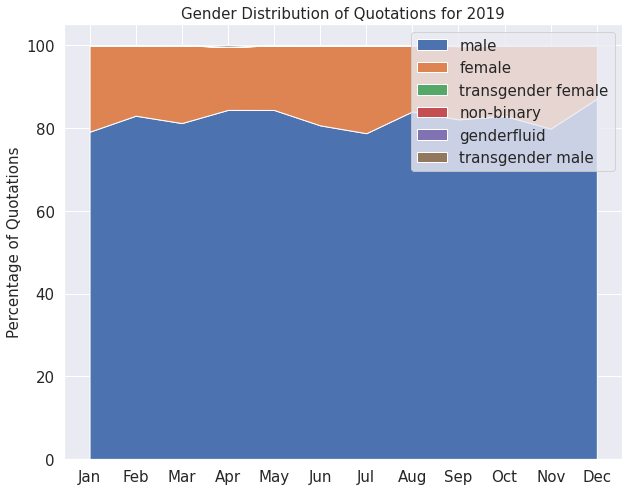

In [67]:
sns.set_theme()

# Plot Percentage
plt.figure(figsize=(10,8))
y_list = [monthly_percent[gender] for gender in monthly_percent]
label_list = [gender for gender in monthly_percent]

plt.stackplot(range(1,13), y_list, labels=(label_list))

months_list = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.xticks(range(1,13), months_list,fontsize=15)

plt.yticks(fontsize=15)
plt.ylabel('Percentage of Quotations', fontsize=15)
plt.title("Gender Distribution of Quotations for 2019",fontsize=15)
plt.legend(fontsize=15)